In [29]:
from pandas import read_csv, to_datetime, Series, DataFrame
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import matplotlib.dates as mdates
from geopy.geocoders import Nominatim #need to pip install geopy

In [72]:
# Open data file
df = read_csv('intake_and_outcome_data.csv')

# Replacing all NaN values of name column with "No name"
df["Name"].fillna("No name", inplace=True)

# Converts string dates to datetime dtypes
df["Date Of Birth"] = to_datetime(df["Date Of Birth"])
df["Intake Date"] = to_datetime(df["Intake Date"])
df["Outcome Date"] = to_datetime(df["Outcome Date"])

# Find age in days of animal on intake date if birth date provided
birth_dates = np.array(df["Date Of Birth"], dtype='datetime64[D]')
intake_dates = np.array(df["Intake Date"], dtype='datetime64[D]')
ages = np.array((intake_dates - birth_dates), dtype="int")
ages = np.where(ages < 0, 0, ages) # changes age to zero if born after intake
ages = np.where(np.isnat(birth_dates), np.nan, ages) # gives NaN value if no birthday provided and changes dtype to float64
df['Age In Days'] = ages

def convertAgeToYears(age):
    return age//365.24

def convertDaysInShelterToYears(days):
    return days/365.24

# Calculate average age of animals excluding those with unknown birth dates
avg_age_in_years = np.nanmean(convertAgeToYears(ages))
print(avg_age_in_years)

2.942213049690427


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Female average days in shelter: 11.997448256308477
Male average days in shelter: 11.865361942937986
Neutered average days in shelter: 23.302294845608554
Spayed average days in shelter: 24.19804721655494
Unknown average days in shelter: 5.058691756272402


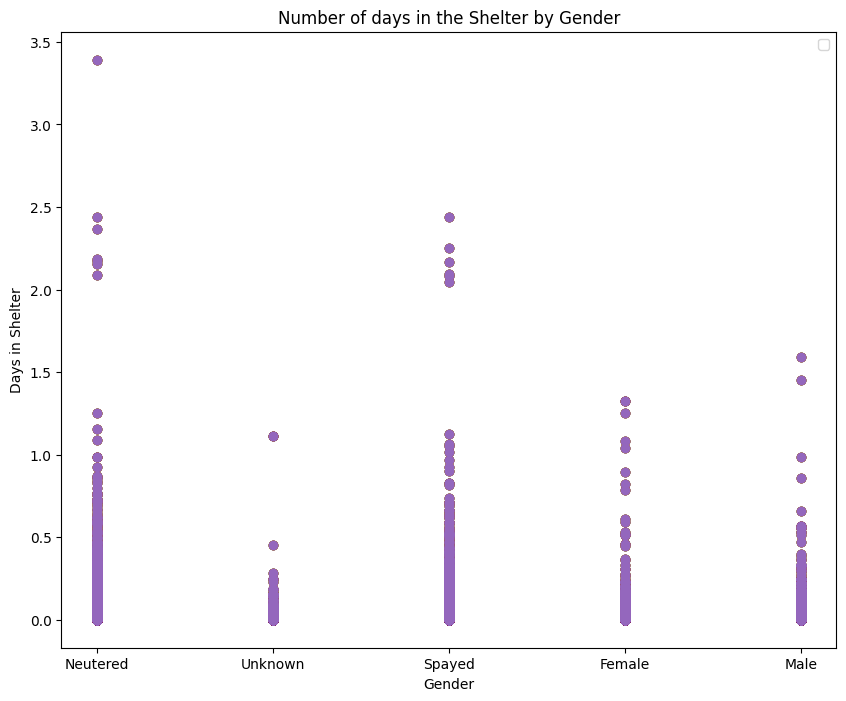

In [73]:
plt.figure(figsize=(10,8))
plt.title("Number of days in the Shelter by Gender")
plt.ylabel("Days in Shelter")
plt.xlabel("Gender")
plotHeight = np.amax(df["Days in Shelter"]) + 1.0

#get unique Gender from dataframe
uniqueGenders = np.unique(df["Sex"])
x_axis = np.arange(len(uniqueGenders))

for gender in uniqueGenders:
    avgGenderDiS = np.average(np.array(df.loc[df["Sex"] == gender,"Days in Shelter"],dtype="float"))
    print(f"{gender} average days in shelter: {avgGenderDiS}")
    plt.scatter(x=df["Sex"],y=convertDaysInShelterToYears(df["Days in Shelter"]))
    #plt.scatter(np.array(df.loc[df["Sex"] == gender,"Days in Shelter"],dtype="float"),y=df["Sex"], height=plotHeight, label=gender)

plt.legend()
plt.show()


In [ ]:
#Converts Location to 'Latitude,Longitude' format
#latlong = np.array(df["Location"], dtype="str")
#latlong = np.char.find('(') < 0 , 'N/A', latlong)
#latlong = [x for x in latlong if '(' in x]
#print(latlong)

test = "38.43807, -122.71247"

#Initialize Nominatim
geolocator = Nominatim(user_agent="geoApiAnimalShelter")

location = geolocator.reverse(test)
print(location)

GeocoderServiceError: [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1002)